<a href="https://colab.research.google.com/github/Shreya-web226/Tems.tech.solution/blob/main/Asset_Allocation_Optimization_in_the_Finance_Sector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimal Weights: [0.62339782 0.07443594 0.30216624]
Expected Portfolio Return: 0.10270283459011256
Expected Portfolio Volatility: 0.25292742694125814
Sharpe Ratio: 0.36651950210066625


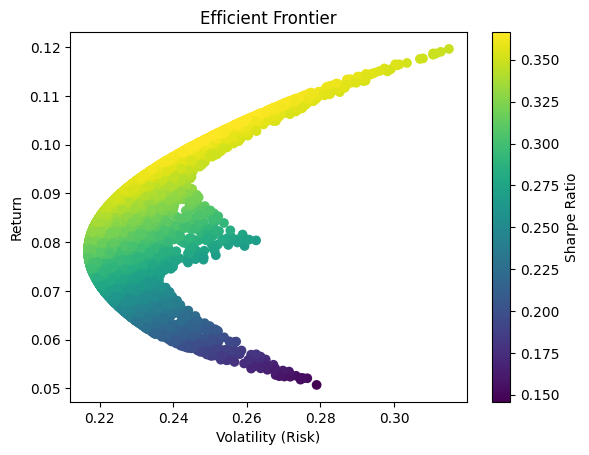

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Step 1: Simulate asset returns (mean returns and covariance matrix)
np.random.seed(42)

# Assume 3 assets: Stocks, Bonds, Real Estate
mean_returns = np.array([0.12, 0.05, 0.08])  # Expected returns for each asset
cov_matrix = np.array([[0.1, 0.02, 0.04],    # Covariance matrix for the assets
                       [0.02, 0.08, 0.03],
                       [0.04, 0.03, 0.07]])

# Step 2: Define the portfolio statistics (returns, volatility, Sharpe ratio)
def portfolio_performance(weights, mean_returns, cov_matrix):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# Step 3: Define the objective function for optimization (negative Sharpe ratio)
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01):
    portfolio_return, portfolio_volatility = portfolio_performance(weights, mean_returns, cov_matrix)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio  # Minimize negative Sharpe ratio

# Step 4: Set constraints and bounds for weights (sum of weights = 1, each weight between 0 and 1)
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})  # Sum of weights = 1
bounds = tuple((0, 1) for asset in range(len(mean_returns)))  # Each weight between 0 and 1

# Initial guess (equal weight for each asset)
initial_guess = len(mean_returns) * [1. / len(mean_returns)]

# Step 5: Perform the optimization
result = minimize(negative_sharpe_ratio, initial_guess, args=(mean_returns, cov_matrix),
                  method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights
optimal_weights = result.x

# Step 6: Display results
portfolio_return, portfolio_volatility = portfolio_performance(optimal_weights, mean_returns, cov_matrix)
sharpe_ratio = (portfolio_return - 0.01) / portfolio_volatility

print("Optimal Weights:", optimal_weights)
print("Expected Portfolio Return:", portfolio_return)
print("Expected Portfolio Volatility:", portfolio_volatility)
print("Sharpe Ratio:", sharpe_ratio)

# Step 7: Plotting the efficient frontier (optional)
def plot_efficient_frontier(mean_returns, cov_matrix, num_portfolios=10000, risk_free_rate=0.01):
    results = np.zeros((3, num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)  # Normalize the weights
        weights_record.append(weights)
        portfolio_return, portfolio_volatility = portfolio_performance(weights, mean_returns, cov_matrix)
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
        results[0,i] = portfolio_return
        results[1,i] = portfolio_volatility
        results[2,i] = sharpe_ratio

    plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis')
    plt.colorbar(label='Sharpe Ratio')
    plt.xlabel('Volatility (Risk)')
    plt.ylabel('Return')
    plt.title('Efficient Frontier')
    plt.show()

plot_efficient_frontier(mean_returns, cov_matrix)
